In [1]:
import matplotlib.pyplot as plt
import tqdm
import random
import numpy as np
import json
import os
import glob
from collections import Counter
from meta_maths import *
import seaborn as sns

In [2]:
print(os.environ.get('CURL_CA_BUNDLE'))
# os.environ['CURL_CA_BUNDLE'] = '/etc/ssl/certs/ca-certificates.crt'
os.environ['CURL_CA_BUNDLE'] = ''

None


In [3]:
token = open('token.txt').read().strip()
os.environ['REPLICATE_API_TOKEN'] = token

In [4]:
# # The meta/meta-llama-3-70b-instruct model can stream output as it's running.
# for event in replicate.stream(
#     "meta/meta-llama-3-70b-instruct",
#     input={g
#         "top_k": 0,
#         "top_p": 0.9,
#         "prompt": "Can you tell me which model version you are and how many parameters you have?",
#         "max_tokens": 512,
#         "min_tokens": 0,
#         "temperature": 0.6,
#         "system_prompt": "You are a helpful assistant",
#         "length_penalty": 1,
#         "stop_sequences": "<|end_of_text|>,<|eot_id|>",
#         "prompt_template": "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are a helpful assistant<|eot_id|><|start_header_id|>user<|end_header_id|>\n\n{prompt}<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n",
#         "presence_penalty": 1.15,
#         "log_performance_metrics": False
#     },
# ):
#     print(str(event), end="")

In [5]:
# ai = MetaAI()
# response = ai.prompt(message="Can you tell me which version of model you are? Also, how many parameters do you have?")
# print(response)

In [6]:
expression = generate_multiplication_expression(5)
response = query_ai_replicate(expression)
print(f'Expression: {expression}     Response: {response}     Answer: {eval(expression)}')

ConnectError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1000)

In [50]:
# expression = generate_ooo_expression(n_ops=5, max_int=9)
# response = query_ai_replicate(expression)
# print(f'Expression: {expression}     Response: {response}     Answer: {eval(expression)}')

In [51]:
# results = take_exam(n_questions=500, n_agents=25, n_ops=[1,2,3], max_int=99, savedir=f'math_outputs/test1_500questions_25agents_1-2-3ops_99maxint_nomodulo')
# results = take_exam(n_questions=500, n_agents=25, n_ops=[1,2,3], max_int=99, savedir=f'math_outputs/test1_500questions_25agents_1-2-3-4-5-6ops_9maxint_nomodulo')
# results = take_exam(n_questions=500, n_agents=25, n_ops=1, max_int=[3,4,5,6,7], savedir=f'math_outputs/test1_500questions_25agents_multiplication_3-7digits')

In [52]:
# results = take_exam(n_questions=14, n_agents=50, n_ops=[1,2,3,4,5,6], max_int=9, savedir=f'math_outputs/test1_500questions_50agents_1-2-3-4-5-6ops_9maxint_nomodulo', mult_or_ooo = 'ooo')
# results = take_exam(n_questions=11, n_agents=50, n_ops=1, max_int=[3,4,5,6,7], savedir=f'math_outputs/test1_500questions_50agents_multiplication_3-7digits', mult_or_ooo == 'mult')

In [53]:
# Open ensemble results
questions = []
responses = []
answers = []
n_ops = []
n_agents = []
max_int = []

for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_50agents_1-2-3-4-5-6ops_9maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_25agents_multiplication_3-7digits/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_25agents_1-2-3ops_99maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_25agents_1-2-3-4-5-6ops_9maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_200questions_25agents_4-5-6ops_4maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/strevor/repos/LLM_ensembling/maths/math_outputs/test1_200questions_25agents_2-3-4ops_9maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_200questions_25agents_2-3-4ops_9maxint/*.json')):
    try:
        with open(file, 'r') as f:
            data = json.load(f)
            questions.append(data['expression'])
            responses.append(data['responses'])
            answers.append(data['correct'])
            n_ops.append(data['n_ops'])
            n_agents.append(data['n_agents'])
            max_int.append(data['max_int'])
    except:
        print(file)
        os.remove(file)

100%|██████████| 1000/1000 [00:00<00:00, 52147.21it/s]


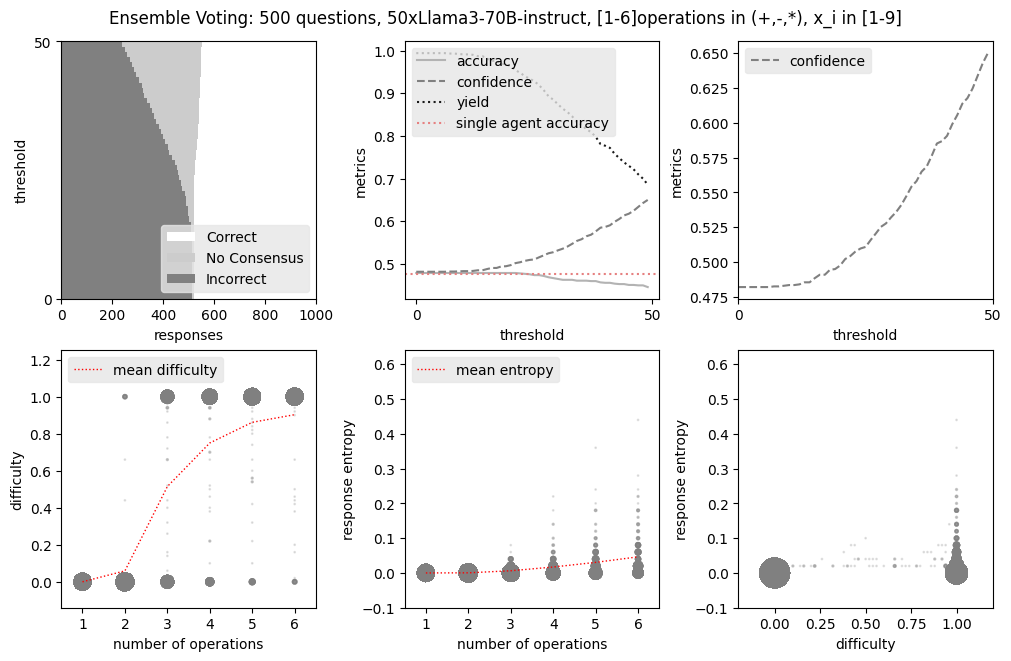

In [54]:
thresholds = 50
running_vals = [[vote_count([vote(responses[i], thresh, answers[i]) for i in range(len(responses))]) for thresh in np.linspace(0, 1, thresholds)]]

mean_values = np.mean(np.array(running_vals), axis=0)

accuracy = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,1] + np.array(running_vals)[:,:,2])
accuracy_mean = np.nanmean(accuracy, axis=0)

raw_yield = (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2]) / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,1] + np.array(running_vals)[:,:,2])
raw_yield_mean = np.nanmean(raw_yield, axis=0)

confidence = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2])
confidence_mean = np.nanmean(confidence, axis=0)

confidence_std = np.nanstd(confidence, axis=0)
confidence_lower = np.nanpercentile(confidence, 2.5, axis=0)
confidence_upper = np.nanpercentile(confidence, 97.5, axis=0)

difficulty = []
for i in range(len(responses)):
    difficulty.append(1-np.sum(np.array(responses[i]) == answers[i])/len(responses[i]))
single_model_acc = 1-float(np.mean(np.array(difficulty)))


fig, ax = plt.subplots(2,3, figsize=(10,6.5), constrained_layout=True)

ax[0,0].stairs(np.array(mean_values)[:,0] + np.array(mean_values)[:,1] + np.array(mean_values)[:,2], fill=True, orientation='horizontal', color=[1,1,1], label='Correct')
ax[0,0].stairs(np.array(mean_values)[:,0] + np.array(mean_values)[:,1], fill=True, orientation='horizontal', color=[0.8,0.8,0.8], label='No Consensus')
ax[0,0].stairs(np.array(mean_values)[:,0], fill=True, orientation='horizontal', color=[0.5,0.5,0.5], label='Incorrect')
ax[0,0].set_ylim([0, thresholds])
ax[0,0].set_xlim([0, len(questions)])
ax[0,0].set_yticks([0, thresholds])
# ax[0,0].set_yticklabels(['0', '1'])
ax[0,0].set_ylabel('threshold')
ax[0,0].set_xlabel('responses')
ax[0,0].legend(loc = 'lower right', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[0,1].plot(accuracy_mean, color=[0.7,0.7,0.7], label='accuracy')
ax[0,1].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='confidence')
ax[0,1].plot(raw_yield_mean, color=[0.1,0.1,0.1], linestyle=':', label='yield')
ax[0,1].set_ylabel('metrics')
ax[0,1].set_xlabel('threshold')
ax[0,1].set_xticks([0, thresholds])
# ax[0,1].set_xticklabels(['0', '1'])
ax[0,1].axhline(y=single_model_acc, color=[0.9,0.5,0.5], linestyle=':', label='single agent accuracy')
ax[0,1].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[0,2].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='confidence')
ax[0,2].set_ylabel('metrics')
ax[0,2].set_xlabel('threshold')
ax[0,2].set_xlim([0, thresholds])
ax[0,2].set_xticks([0, thresholds])
# ax[0,2].set_xticklabels(['0', '1'])


ax[0,2].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ops = [sum([1 for ch in question if ch in ['+', '-', '*']]) for question in questions]
c = Counter(zip(ops,difficulty))
s = [(c[(xx,yy)]) for xx,yy in zip(ops,difficulty)]
ax[1,0].scatter(np.array(ops), 
              np.array(difficulty), 
              s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[1,0].plot(n_ops[0],[float(np.mean(np.array(difficulty)[np.where(np.array(ops) == n_op)[0]])) for n_op in n_ops[0]], 
             c='r', alpha=1, linewidth=1, linestyle=':', label='mean difficulty')
ax[1,0].set_xlabel('number of operations')
ax[1,0].set_ylabel('difficulty')
ax[1,0].set_xticks(n_ops[0])
ax[1,0].set_xlim([min(n_ops[0])-0.5, max(n_ops[0])+0.5])
ax[1,0].set_ylim([-0.14, 1.25])
ax[1,0].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

# entropy = normalized_entropy(responses)
entropy = simple_entropy(responses)

ops = [sum([1 for ch in question if ch in ['+', '-', '*']]) for question in questions]
c = Counter(zip(ops,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(ops,entropy)]
ax[1,1].scatter(np.array(ops), 
              np.array(entropy), 
              s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[1,1].plot(n_ops[0],[float(np.mean(np.array(entropy)[np.where(np.array(ops) == n_op)[0]])) for n_op in n_ops[0]], 
             c='r', alpha=1, linewidth=1, linestyle=':', label='mean entropy')
ax[1,1].set_xlabel('number of operations')
ax[1,1].set_ylabel('response entropy')
ax[1,1].set_xticks(n_ops[0])
ax[1,1].set_xlim([min(n_ops[0])-0.5, max(n_ops[0])+0.5])
ax[1,1].set_ylim([-0.1, max(entropy)+0.2])
ax[1,1].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

c = Counter(zip(difficulty,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(difficulty,entropy)]
ax[1,2].scatter(difficulty, entropy, s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[1,2].set_xlim([-0.2, 1.2])
ax[1,2].set_ylim([-0.1, max(entropy)+0.2])
ax[1,2].set_xlabel('difficulty')
ax[1,2].set_ylabel('response entropy')

# for a in ax.flatten()[1:]:
#     a.spines[['right', 'top']].set_visible(False)

# 
# suptitle(f'Ensemble Voting: {500} questions, {25}xLlama3-70B-instruct, [1-3]operations in (+,-,*), x_i in [1-99]', fontsize=12)
# plt.savefig(f'EnsembleVoting_q{500}_a{25}_1-3ops_1-99ints.png', format='png', dpi=300)

plt.suptitle(f'Ensemble Voting: {500} questions, {50}xLlama3-70B-instruct, [1-6]operations in (+,-,*), x_i in [1-9]', fontsize=12)
plt.savefig(f'EnsembleVoting_q{500}_a{50}_1-6ops_1-9ints.png', format='png', dpi=300)

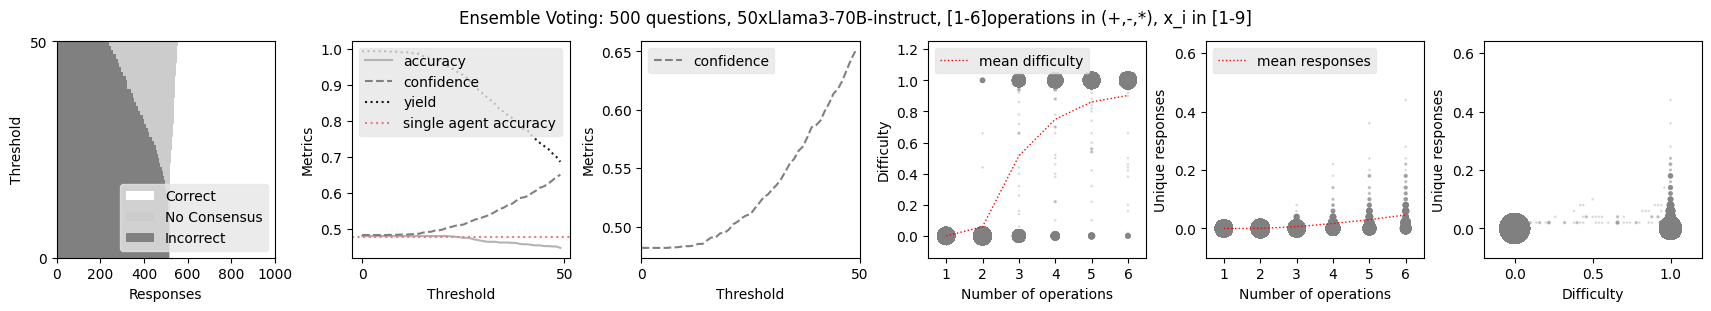

In [55]:
thresholds = 50
running_vals = [[vote_count([vote(responses[i], thresh, answers[i]) for i in range(len(responses))]) for thresh in np.linspace(0, 1, thresholds)]]

mean_values = np.mean(np.array(running_vals), axis=0)

accuracy = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,1] + np.array(running_vals)[:,:,2])
accuracy_mean = np.nanmean(accuracy, axis=0)

raw_yield = (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2]) / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,1] + np.array(running_vals)[:,:,2])
raw_yield_mean = np.nanmean(raw_yield, axis=0)

confidence = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2])
confidence_mean = np.nanmean(confidence, axis=0)

confidence_std = np.nanstd(confidence, axis=0)
confidence_lower = np.nanpercentile(confidence, 2.5, axis=0)
confidence_upper = np.nanpercentile(confidence, 97.5, axis=0)

difficulty = []
for i in range(len(responses)):
    difficulty.append(1-np.sum(np.array(responses[i]) == answers[i])/len(responses[i]))
single_model_acc = 1-float(np.mean(np.array(difficulty)))


fig, ax = plt.subplots(1,6, figsize=(17,3), constrained_layout=True)

ax[0].stairs(np.array(mean_values)[:,0] + np.array(mean_values)[:,1] + np.array(mean_values)[:,2], fill=True, orientation='horizontal', color=[1,1,1], label='Correct')
ax[0].stairs(np.array(mean_values)[:,0] + np.array(mean_values)[:,1], fill=True, orientation='horizontal', color=[0.8,0.8,0.8], label='No Consensus')
ax[0].stairs(np.array(mean_values)[:,0], fill=True, orientation='horizontal', color=[0.5,0.5,0.5], label='Incorrect')
ax[0].set_ylim([0, thresholds])
ax[0].set_xlim([0, len(questions)])
ax[0].set_yticks([0, thresholds])
ax[0].set_ylabel('Threshold')
ax[0].set_xlabel('Responses')
ax[0].legend(loc = 'lower right', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[1].plot(accuracy_mean, color=[0.7,0.7,0.7], label='accuracy')
ax[1].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='confidence')
ax[1].plot(raw_yield_mean, color=[0.1,0.1,0.1], linestyle=':', label='yield')
ax[1].set_ylabel('Metrics')
ax[1].set_xlabel('Threshold')
ax[1].set_xticks([0, thresholds])
ax[1].axhline(y=single_model_acc, color=[0.9,0.5,0.5], linestyle=':', label='single agent accuracy')
ax[1].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[2].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='confidence')
ax[2].set_ylabel('Metrics')
ax[2].set_xlabel('Threshold')
ax[2].set_xlim([0, thresholds])
ax[2].set_xticks([0, thresholds])
ax[2].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ops = [sum([1 for ch in question if ch in ['+', '-', '*']]) for question in questions]
c = Counter(zip(ops,difficulty))
s = [(c[(xx,yy)]) for xx,yy in zip(ops,difficulty)]
ax[3].scatter(np.array(ops), 
              np.array(difficulty), 
              s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[3].plot(n_ops[0],[float(np.mean(np.array(difficulty)[np.where(np.array(ops) == n_op)[0]])) for n_op in n_ops[0]], 
             c='r', alpha=1, linewidth=1, linestyle=':', label='mean difficulty')
ax[3].set_xlabel('Number of operations')
ax[3].set_ylabel('Difficulty')
ax[3].set_xticks(n_ops[0])
ax[3].set_xlim([min(n_ops[0])-0.5, max(n_ops[0])+0.5])
ax[3].set_ylim([-0.14, 1.25])
ax[3].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

# entropy = normalized_entropy(responses)
entropy = simple_entropy(responses)

ops = [sum([1 for ch in question if ch in ['+', '-', '*']]) for question in questions]
c = Counter(zip(ops,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(ops,entropy)]
ax[4].scatter(np.array(ops), 
              np.array(entropy), 
              s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[4].plot(n_ops[0],[float(np.mean(np.array(entropy)[np.where(np.array(ops) == n_op)[0]])) for n_op in n_ops[0]], 
             c='r', alpha=1, linewidth=1, linestyle=':', label='mean responses')
ax[4].set_xlabel('Number of operations')
ax[4].set_ylabel('Unique responses')
ax[4].set_xticks(n_ops[0])
ax[4].set_xlim([min(n_ops[0])-0.5, max(n_ops[0])+0.5])
ax[4].set_ylim([-0.1, max(entropy)+0.2])
ax[4].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

c = Counter(zip(difficulty,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(difficulty,entropy)]
ax[5].scatter(difficulty, entropy, s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[5].set_xlim([-0.2, 1.2])
ax[5].set_ylim([-0.1, max(entropy)+0.2])
ax[5].set_xlabel('Difficulty')
ax[5].set_ylabel('Unique responses')

plt.suptitle(f'Ensemble Voting: {500} questions, {50}xLlama3-70B-instruct, [1-6]operations in (+,-,*), x_i in [1-9]', fontsize=12)
plt.savefig(f'EnsembleVoting_q{500}_a{50}_1-6ops_1-9ints.png', format='png', dpi=300)

0.260824849098766


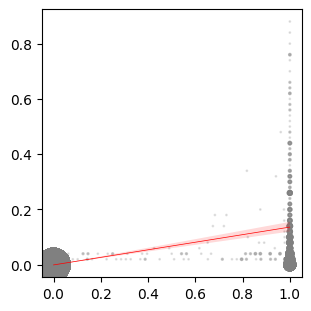

In [ ]:
import statsmodels.api as sm
confusion = (np.array(difficulty) - np.array(entropy))/(1 - np.array(entropy))
confusion2 = sm.add_constant(confusion)
model = sm.OLS(entropy, confusion2).fit()
R2 = model.rsquared
print(R2)

fig, ax = plt.subplots(1,1, figsize=(3,3), constrained_layout=True)
c = Counter(zip(difficulty,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(difficulty,entropy)]
sns.regplot(ax=ax, x=confusion, y=entropy, scatter_kws={'alpha':0.2, 'color':[0.5,0.5,0.5], 's':s}, line_kws={'color':'r', 'linewidth':0.5})

ooo_confusion = confusion
ooo_uncertainty = entropy
ooo_p = np.sqrt(R2)

0.03095543840314019


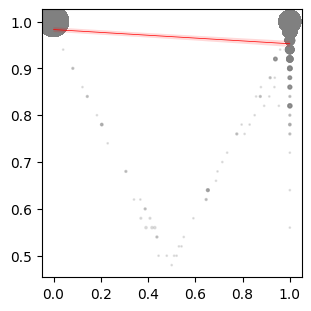

In [57]:
import statsmodels.api as sm
confusion = (np.array(difficulty) - np.array(entropy))/(1 - np.array(entropy))
f = fmax(responses, difficulty)
confusion2 = sm.add_constant(confusion)
model = sm.OLS(f, confusion2).fit()
R2 = model.rsquared
print(R2)

fig, ax = plt.subplots(1,1, figsize=(3,3), constrained_layout=True)
c = Counter(zip(difficulty,f))
s = [(c[(xx,yy)]) for xx,yy in zip(difficulty,f)]
sns.regplot(ax=ax, x=confusion, y=f, scatter_kws={'alpha':0.2, 'color':[0.5,0.5,0.5], 's':s}, line_kws={'color':'r', 'linewidth':0.5})

ooo_confusion = confusion
ooo_fmax = f
ooo_p = np.sqrt(R2)

In [58]:
confidence

array([[0.48189135, 0.48189135, 0.48189135, 0.48189135, 0.48189135,
        0.48189135, 0.48189135, 0.48237664, 0.48237664, 0.4828629 ,
        0.48335015, 0.48335015, 0.48383838, 0.48530902, 0.48530902,
        0.48827727, 0.49077869, 0.49077869, 0.49432405, 0.49483471,
        0.49740395, 0.50209644, 0.50421941, 0.50744681, 0.50963597,
        0.51077586, 0.51577802, 0.52039691, 0.52519597, 0.52768362,
        0.53203661, 0.53587963, 0.54088785, 0.54728132, 0.55408654,
        0.55811138, 0.56495098, 0.56860321, 0.5764411 , 0.58514725,
        0.58687259, 0.59067358, 0.59894459, 0.60561497, 0.61382114,
        0.61780822, 0.62465374, 0.63380282, 0.64285714, 0.65014577]])

(-0.1, 0.54)

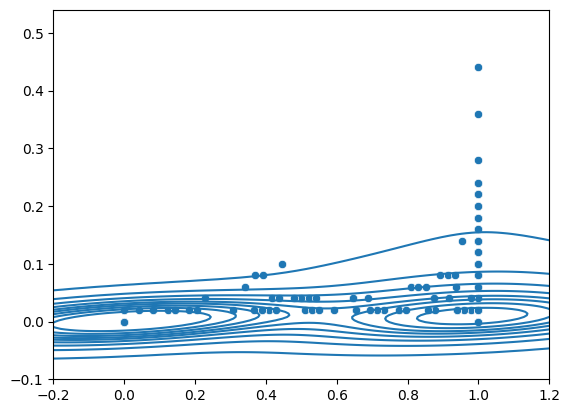

In [59]:
sns.kdeplot(
    x=confusion, y=entropy,
    levels=10,
    bw_adjust=2,
)
sns.scatterplot(x=confusion, y=entropy)

plt.gca().set_xlim([-0.2, 1.2])
plt.gca().set_ylim([-0.1, max(entropy)+0.1])

In [60]:
# Open ensemble results
questions = []
responses = []
answers = []
n_ops = []
n_agents = []
max_int = []

for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_50agents_multiplication_3-7digits/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_25agents_1-2-3ops_99maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_500questions_25agents_1-2-3-4-5-6ops_9maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_200questions_25agents_4-5-6ops_4maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/strevor/repos/LLM_ensembling/maths/math_outputs/test1_200questions_25agents_2-3-4ops_9maxint_nomodulo/*.json')):
# for file in tqdm.tqdm(glob.glob('/home/trevor/repos/LLM_ensembling/maths/math_outputs/test1_200questions_25agents_2-3-4ops_9maxint/*.json')):
    try:
        with open(file, 'r') as f:
            data = json.load(f)
            questions.append(data['expression'])
            responses.append(data['responses'])
            answers.append(data['correct'])
            n_ops.append(data['n_ops'])
            n_agents.append(data['n_agents'])
            max_int.append(data['max_int'])
    except:
        print(file)
        os.remove(file)

100%|██████████| 1000/1000 [00:00<00:00, 54749.49it/s]


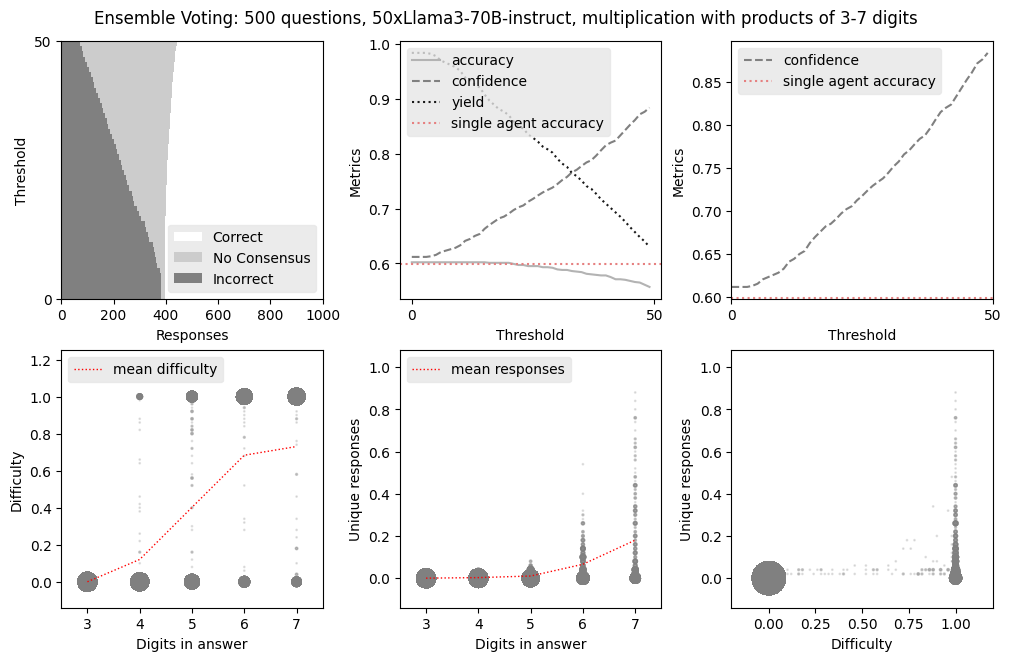

In [61]:
thresholds = 50
running_vals = [[vote_count([vote(responses[i], thresh, answers[i]) for i in range(len(responses))]) for thresh in np.linspace(0, 1, thresholds)]]

mean_values = np.mean(np.array(running_vals), axis=0)

accuracy = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,1] + np.array(running_vals)[:,:,2])
accuracy_mean = np.nanmean(accuracy, axis=0)

raw_yield = (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2]) / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,1] + np.array(running_vals)[:,:,2])
raw_yield_mean = np.nanmean(raw_yield, axis=0)

confidence = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2])
confidence_mean = np.nanmean(confidence, axis=0)

confidence_std = np.nanstd(confidence, axis=0)
confidence_lower = np.nanpercentile(confidence, 2.5, axis=0)
confidence_upper = np.nanpercentile(confidence, 97.5, axis=0)

difficulty = []
for i in range(len(responses)):
    difficulty.append(1-np.sum(np.array(responses[i]) == answers[i])/len(responses[i]))
single_model_acc = 1-float(np.mean(np.array(difficulty)))


fig, ax = plt.subplots(2,3, figsize=(10,6.5), constrained_layout=True)

ax[0,0].stairs(np.array(mean_values)[:,0] + np.array(mean_values)[:,1] + np.array(mean_values)[:,2], fill=True, orientation='horizontal', color=[1,1,1], label='Correct')
ax[0,0].stairs(np.array(mean_values)[:,0] + np.array(mean_values)[:,1], fill=True, orientation='horizontal', color=[0.8,0.8,0.8], label='No Consensus')
ax[0,0].stairs(np.array(mean_values)[:,0], fill=True, orientation='horizontal', color=[0.5,0.5,0.5], label='Incorrect')
ax[0,0].set_ylim([0, thresholds])
ax[0,0].set_xlim([0, len(questions)])
ax[0,0].set_yticks([0, thresholds])
# ax[0,0].set_yticklabels(['0', '1'])
ax[0,0].set_ylabel('Threshold')
ax[0,0].set_xlabel('Responses')
ax[0,0].legend(loc = 'lower right', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[0,1].plot(accuracy_mean, color=[0.7,0.7,0.7], label='accuracy')
ax[0,1].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='confidence')
ax[0,1].plot(raw_yield_mean, color=[0.1,0.1,0.1], linestyle=':', label='yield')
ax[0,1].set_ylabel('Metrics')
ax[0,1].set_xlabel('Threshold')
ax[0,1].set_xticks([0, thresholds])
# ax[0,1].set_xticklabels(['0', '1'])
ax[0,1].axhline(y=single_model_acc, color=[0.9,0.5,0.5], linestyle=':', label='single agent accuracy')
ax[0,1].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[0,2].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='confidence')
ax[0,2].set_ylabel('Metrics')
# ax[2].set_ylim([0.6, 1.05])
ax[0,2].set_xlabel('Threshold')
ax[0,2].set_xlim([0, thresholds])
ax[0,2].set_xticks([0, thresholds])
# ax[0,2].set_xticklabels(['0', '1'])
ax[0,2].axhline(y=single_model_acc, color=[0.9,0.5,0.5], linestyle=':', label='single agent accuracy')
ax[0,2].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

digits = [len(str(answer)) for answer in answers]
n_digits = list(set(digits))
c = Counter(zip(digits,difficulty))
s = [(c[(xx,yy)]) for xx,yy in zip(digits,difficulty)]
ax[1,0].scatter(np.array(digits), 
              np.array(difficulty), 
              s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[1,0].plot(n_digits,[float(np.mean(np.array(difficulty)[np.where(np.array(digits) == n_d)[0]])) for n_d in n_digits], 
             c='r', alpha=1, linewidth=1, linestyle=':', label='mean difficulty')
ax[1,0].set_xlabel('Digits in answer')
ax[1,0].set_ylabel('Difficulty')
ax[1,0].set_xticks(n_digits)
ax[1,0].set_xlim([min(digits)-0.5, max(digits)+0.5])
ax[1,0].set_ylim([-0.14, 1.25])
ax[1,0].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

# entropy = normalized_entropy(responses)
entropy = simple_entropy(responses)

c = Counter(zip(digits,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(digits,entropy)]
ax[1,1].scatter(np.array(digits), 
              np.array(entropy), 
              s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[1,1].plot(n_digits,[float(np.mean(np.array(entropy)[np.where(np.array(digits) == d)[0]])) for d in n_digits], 
             c='r', alpha=1, linewidth=1, linestyle=':', label='mean responses')
ax[1,1].set_xlabel('Digits in answer')
ax[1,1].set_ylabel('Unique responses')
ax[1,1].set_xticks(n_digits)
ax[1,1].set_xlim([min(digits)-0.5, max(digits)+0.5])
ax[1,1].set_ylim([-0.14, max(entropy)+0.2])
ax[1,1].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

c = Counter(zip(difficulty,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(difficulty,entropy)]
ax[1,2].scatter(difficulty, entropy, s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[1,2].set_xlim([-0.2, 1.2])
ax[1,2].set_ylim([-0.14, max(entropy)+0.2])
ax[1,2].set_xlabel('Difficulty')
ax[1,2].set_ylabel('Unique responses')

# a,b = np.polyfit(entropy, difficulty, 1)
# x = np.linspace(0, 1, 100)
# ax[1,2].plot(x, a*x + b, color='r', linestyle=':', label='linear fit')
# ax[1,2].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

# for a in ax.flatten()[1:]:
#     a.spines[['right', 'top']].set_visible(False)

plt.suptitle(f'Ensemble Voting: {500} questions, {50}xLlama3-70B-instruct, multiplication with products of 3-7 digits', fontsize=12)
plt.savefig(f'EnsembleVoting_q{500}_a{25}_multiplication_3-7digits.png', format='png', dpi=300)

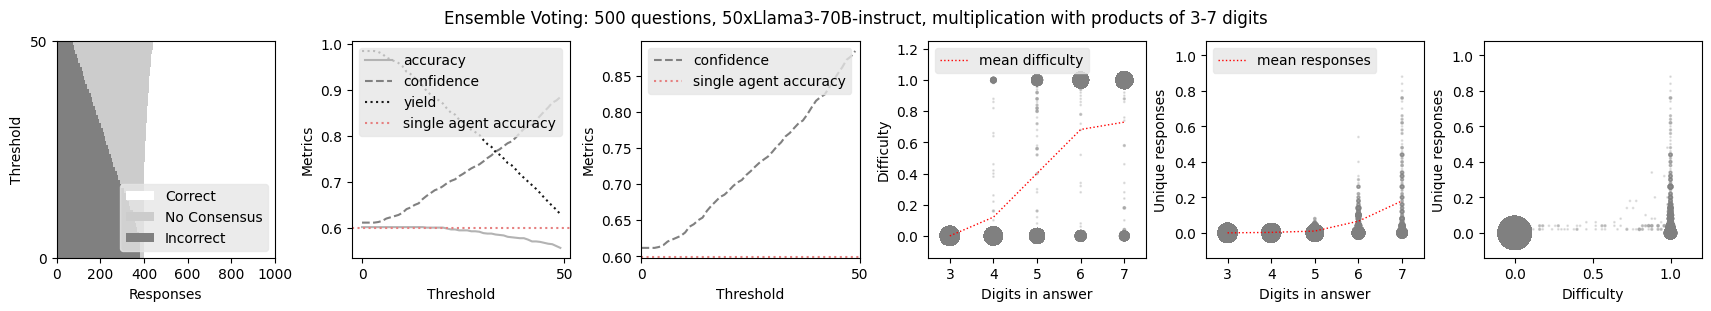

In [62]:
thresholds = 50
running_vals = [[vote_count([vote(responses[i], thresh, answers[i]) for i in range(len(responses))]) for thresh in np.linspace(0, 1, thresholds)]]

mean_values = np.mean(np.array(running_vals), axis=0)

accuracy = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,1] + np.array(running_vals)[:,:,2])
accuracy_mean = np.nanmean(accuracy, axis=0)

raw_yield = (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2]) / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,1] + np.array(running_vals)[:,:,2])
raw_yield_mean = np.nanmean(raw_yield, axis=0)

confidence = np.array(running_vals)[:,:,2] / (np.array(running_vals)[:,:,0] + np.array(running_vals)[:,:,2])
confidence_mean = np.nanmean(confidence, axis=0)

confidence_std = np.nanstd(confidence, axis=0)
confidence_lower = np.nanpercentile(confidence, 2.5, axis=0)
confidence_upper = np.nanpercentile(confidence, 97.5, axis=0)

difficulty = []
for i in range(len(responses)):
    difficulty.append(1-np.sum(np.array(responses[i]) == answers[i])/len(responses[i]))
single_model_acc = 1-float(np.mean(np.array(difficulty)))


fig, ax = plt.subplots(1,6, figsize=(17,3), constrained_layout=True)

ax[0].stairs(np.array(mean_values)[:,0] + np.array(mean_values)[:,1] + np.array(mean_values)[:,2], fill=True, orientation='horizontal', color=[1,1,1], label='Correct')
ax[0].stairs(np.array(mean_values)[:,0] + np.array(mean_values)[:,1], fill=True, orientation='horizontal', color=[0.8,0.8,0.8], label='No Consensus')
ax[0].stairs(np.array(mean_values)[:,0], fill=True, orientation='horizontal', color=[0.5,0.5,0.5], label='Incorrect')
ax[0].set_ylim([0, thresholds])
ax[0].set_xlim([0, len(questions)])
ax[0].set_yticks([0, thresholds])
ax[0].set_ylabel('Threshold')
ax[0].set_xlabel('Responses')
ax[0].legend(loc = 'lower right', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[1].plot(accuracy_mean, color=[0.7,0.7,0.7], label='accuracy')
ax[1].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='confidence')
ax[1].plot(raw_yield_mean, color=[0.1,0.1,0.1], linestyle=':', label='yield')
ax[1].set_ylabel('Metrics')
ax[1].set_xlabel('Threshold')
ax[1].set_xticks([0, thresholds])
ax[1].axhline(y=single_model_acc, color=[0.9,0.5,0.5], linestyle=':', label='single agent accuracy')
ax[1].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[2].plot(confidence_mean, color=[0.5,0.5,0.5], linestyle='--', label='confidence')
ax[2].set_ylabel('Metrics')
ax[2].set_xlabel('Threshold')
ax[2].set_xlim([0, thresholds])
ax[2].set_xticks([0, thresholds])
ax[2].axhline(y=single_model_acc, color=[0.9,0.5,0.5], linestyle=':', label='single agent accuracy')
ax[2].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

digits = [len(str(answer)) for answer in answers]
n_digits = list(set(digits))
c = Counter(zip(digits,difficulty))
s = [(c[(xx,yy)]) for xx,yy in zip(digits,difficulty)]
ax[3].scatter(np.array(digits), 
              np.array(difficulty), 
              s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[3].plot(n_digits,[float(np.mean(np.array(difficulty)[np.where(np.array(digits) == n_d)[0]])) for n_d in n_digits], 
             c='r', alpha=1, linewidth=1, linestyle=':', label='mean difficulty')
ax[3].set_xlabel('Digits in answer')
ax[3].set_ylabel('Difficulty')
ax[3].set_xticks(n_digits)
ax[3].set_xlim([min(digits)-0.5, max(digits)+0.5])
ax[3].set_ylim([-0.14, 1.25])
ax[3].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

# entropy = normalized_entropy(responses)
entropy = simple_entropy(responses)

c = Counter(zip(digits,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(digits,entropy)]
ax[4].scatter(np.array(digits), 
              np.array(entropy), 
              s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[4].plot(n_digits,[float(np.mean(np.array(entropy)[np.where(np.array(digits) == d)[0]])) for d in n_digits], 
             c='r', alpha=1, linewidth=1, linestyle=':', label='mean responses')
ax[4].set_xlabel('Digits in answer')
ax[4].set_ylabel('Unique responses')
ax[4].set_xticks(n_digits)
ax[4].set_xlim([min(digits)-0.5, max(digits)+0.5])
ax[4].set_ylim([-0.14, max(entropy)+0.2])
ax[4].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

c = Counter(zip(difficulty,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(difficulty,entropy)]
ax[5].scatter(difficulty, entropy, s=s, color=[0.5, 0.5, 0.5], alpha=0.2)
ax[5].set_xlim([-0.2, 1.2])
ax[5].set_ylim([-0.14, max(entropy)+0.2])
ax[5].set_xlabel('Difficulty')
ax[5].set_ylabel('Unique responses')

plt.suptitle(f'Ensemble Voting: {500} questions, {50}xLlama3-70B-instruct, multiplication with products of 3-7 digits', fontsize=12)
plt.savefig(f'EnsembleVoting_q{500}_a{25}_multiplication_3-7digits.png', format='png', dpi=300)

0.260824849098766


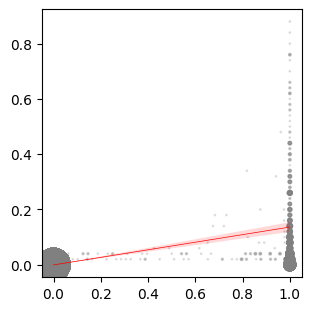

In [63]:
import statsmodels.api as sm
confusion = (np.array(difficulty) - np.array(entropy))/(1 - np.array(entropy))
confusion2 = sm.add_constant(confusion)
model = sm.OLS(entropy, confusion2).fit()
R2 = model.rsquared
print(R2)

fig, ax = plt.subplots(1,1, figsize=(3,3), constrained_layout=True)
c = Counter(zip(difficulty,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(difficulty,entropy)]
sns.regplot(ax=ax, x=confusion, y=entropy, scatter_kws={'alpha':0.2, 'color':[0.5,0.5,0.5], 's':s}, line_kws={'color':'r', 'linewidth':0.5})

mult_confusion = confusion
mult_uncertainty = entropy
mult_fmax = fmax(responses, difficulty)
mult_p = np.sqrt(R2)

0.2421940241283267


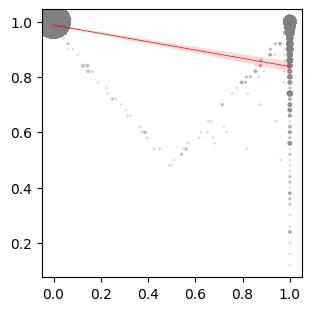

In [64]:
import statsmodels.api as sm
confusion = (np.array(difficulty) - np.array(entropy))/(1 - np.array(entropy))
f = fmax(responses, difficulty)
confusion2 = sm.add_constant(confusion)
model = sm.OLS(f, confusion2).fit()
R2 = model.rsquared
print(R2)

fig, ax = plt.subplots(1,1, figsize=(3,3), constrained_layout=True)
c = Counter(zip(difficulty,f))
s = [(c[(xx,yy)]) for xx,yy in zip(difficulty,f)]
sns.regplot(ax=ax, x=confusion, y=f, scatter_kws={'alpha':0.2, 'color':[0.5,0.5,0.5], 's':s}, line_kws={'color':'r', 'linewidth':0.5})

mult_confusion = confusion
mult_fmax = f
mult_p = np.sqrt(R2)

In [65]:
confidence

array([[0.61178862, 0.61178862, 0.61178862, 0.61178862, 0.61303462,
        0.61554192, 0.62061856, 0.62318841, 0.62577963, 0.62839248,
        0.63301788, 0.64110756, 0.64453961, 0.65010799, 0.65363735,
        0.66299559, 0.67001115, 0.67604049, 0.68217934, 0.68529076,
        0.6908046 , 0.69732247, 0.70235294, 0.70567376, 0.71257485,
        0.71773221, 0.72384428, 0.72939729, 0.73391089, 0.73815461,
        0.74462705, 0.75191816, 0.75773196, 0.76601307, 0.77075099,
        0.77762983, 0.78407557, 0.78804348, 0.79642366, 0.80613668,
        0.81523272, 0.82025678, 0.82395382, 0.83357664, 0.84319527,
        0.85285285, 0.86149163, 0.87191358, 0.8765625 , 0.88412698]])

(-0.1, 0.98)

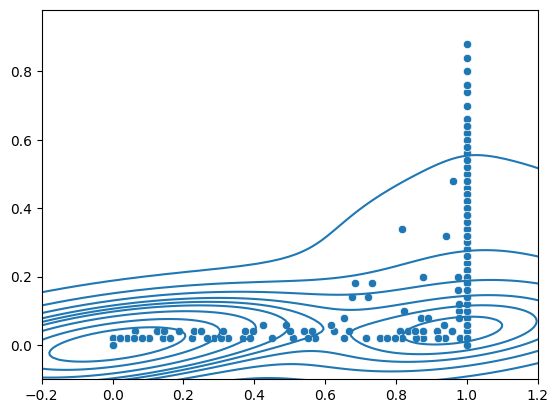

In [66]:
import seaborn as sns
sns.kdeplot(
    x=confusion, y=entropy,
    levels=10,
    bw_adjust=2,
)
sns.scatterplot(x=confusion, y=entropy)

plt.gca().set_xlim([-0.2, 1.2])
plt.gca().set_ylim([-0.1, max(entropy)+0.1])

In [67]:
def generate_series_expression(terms = 6, complexity = 1):
    # https://pmc.ncbi.nlm.nih.gov/articles/PMC6491774/
    # ['a_n = a_{n-1} + k', 'a_n = a_{n-1} * k', 'a_n = a_{n-1} + a_{n-2}', 'a_n = a_{n-1} * a_{n-2}']
    # 1:arithmetic, 2:geometric, 3:addition, 4:multiplication

    zeroth_term = 0
    first_term = random.choice([0,1,2,3,4,5])
    k = random.choice([1,2,3,4,5])

    serieses = []
    for i in range(complexity):
        rule = random.choice([1,2,3,4])
        series = [zeroth_term,first_term]
        print(f'rule: {rule}')
        for i in range(terms+1):
            if rule == 1:
                series.append(series[-1] + k)
            elif rule == 2:
                series.append(series[-1] * k)
            elif rule == 3:
                series.append(series[-1] + series[-2])
            elif rule == 4:
                series.append(series[-1] * series[-2])
        serieses.append(series)
    
    serieses = list(np.sum(np.array(serieses), axis=0))[2:]
    expr = f''
    for s in serieses[:-1]:
        expr += f'{s}, '
    expr = f'{expr}?'
    return expr, int(serieses[-1])

In [68]:
generate_series_expression(5,2)

rule: 3
rule: 2


('16, 44, 120, 344, 1004, ?', 2968)

np.float64(0.03453011575064524)

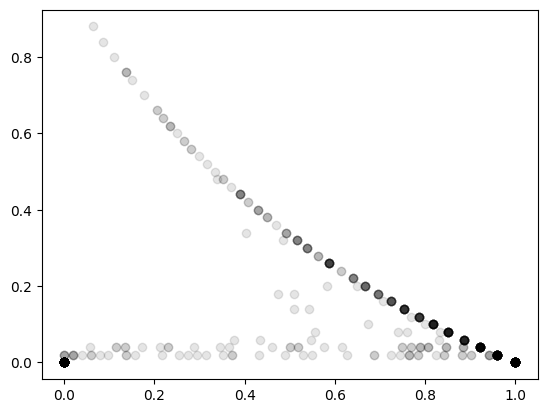

In [69]:
import statsmodels.api as sm
confusion = (np.array(difficulty) - np.array(entropy))/(1 + np.array(entropy))
confusion2 = sm.add_constant(confusion)
model = sm.OLS(entropy, confusion2).fit()
R2 = model.rsquared
plt.scatter(confusion, entropy, alpha=0.1, color='k')
R2

0.260824849098766


<Axes: >

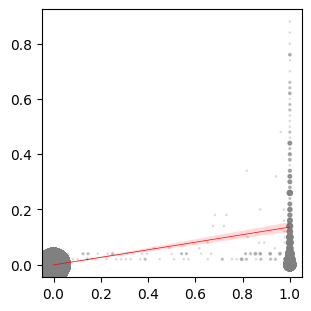

In [70]:
import statsmodels.api as sm
confusion = (np.array(difficulty) - np.array(entropy))/(1 - np.array(entropy))
confusion2 = sm.add_constant(confusion)
model = sm.OLS(entropy, confusion2).fit()
R2 = model.rsquared
print(R2)

fig, ax = plt.subplots(1,1, figsize=(3,3), constrained_layout=True)
c = Counter(zip(difficulty,entropy))
s = [(c[(xx,yy)]) for xx,yy in zip(difficulty,entropy)]
sns.regplot(ax=ax, x=confusion, y=entropy, scatter_kws={'alpha':0.2, 'color':[0.5,0.5,0.5], 's':s}, line_kws={'color':'r', 'linewidth':0.5})

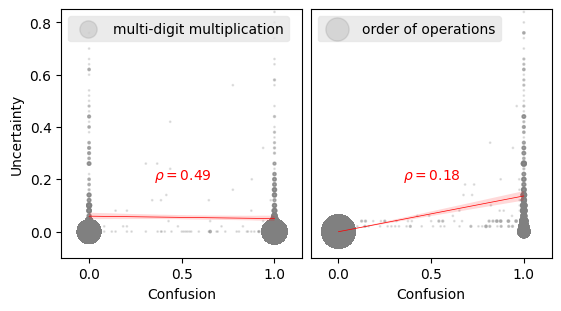

In [87]:
fig, ax = plt.subplots(1,2, figsize=(5.5,3), constrained_layout=True)

c = Counter(zip(ooo_confusion,ooo_uncertainty))
s = [(c[(xx,yy)]) for xx,yy in zip(ooo_confusion,ooo_uncertainty)]
# ax[0].scatter(ooo_confusion, ooo_uncertainty, s=s, color=[0.5, 0.5, 0.5], alpha=0.2, label='multi-digit multiplication')
sns.regplot(ax=ax[0], x=ooo_confusion, y=ooo_uncertainty, scatter_kws={'alpha':0.2, 'color':[0.5,0.5,0.5], 's':s}, line_kws={'color':'r', 'linewidth':0.5}, label='multi-digit multiplication')

c = Counter(zip(mult_confusion,mult_uncertainty))
s = [(c[(xx,yy)]) for xx,yy in zip(mult_confusion,mult_uncertainty)]
# ax[1].scatter(mult_confusion, mult_uncertainty, s=s, color=[0.5, 0.5, 0.5], alpha=0.2, label='order of operations')
sns.regplot(ax=ax[1], x=mult_confusion, y=mult_uncertainty, scatter_kws={'alpha':0.2, 'color':[0.5,0.5,0.5], 's':s}, line_kws={'color':'r', 'linewidth':0.5}, label='order of operations')


ax[0].set_ylabel('Uncertainty')
for a in ax:
    a.set_xlim([-0.15, 1.15])
    a.set_ylim([-0.1, 0.85])
    a.set_xticks([0, 0.5, 1])
    a.set_xlabel('Confusion')
ax[1].set_yticks([])

ax[0].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])
ax[1].legend(loc = 'upper left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[0].text(0.35, 0.2, f'$\\rho = ${mult_p:.2f}', fontsize=10, color='r')
ax[1].text(0.35, 0.2, f'$\\rho = ${ooo_p:.2f}', fontsize=10, color='r')

plt.savefig('arithmetic_questiondomain.pdf', format='pdf', bbox_inches='tight')

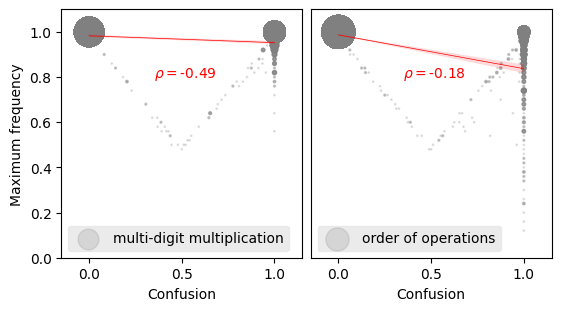

In [91]:
fig, ax = plt.subplots(1,2, figsize=(5.5,3), constrained_layout=True)

c = Counter(zip(ooo_confusion,ooo_fmax))
s = [(c[(xx,yy)]) for xx,yy in zip(ooo_confusion,ooo_fmax)]
# ax[0].scatter(ooo_confusion, ooo_uncertainty, s=s, color=[0.5, 0.5, 0.5], alpha=0.2, label='multi-digit multiplication')
sns.regplot(ax=ax[0], x=ooo_confusion, y=ooo_fmax, scatter_kws={'alpha':0.2, 'color':[0.5,0.5,0.5], 's':s}, line_kws={'color':'r', 'linewidth':0.5}, label='multi-digit multiplication')

c = Counter(zip(mult_confusion,mult_fmax))
s = [(c[(xx,yy)]) for xx,yy in zip(mult_confusion,mult_fmax)]
# ax[1].scatter(mult_confusion, mult_uncertainty, s=s, color=[0.5, 0.5, 0.5], alpha=0.2, label='order of operations')
sns.regplot(ax=ax[1], x=mult_confusion, y=mult_fmax, scatter_kws={'alpha':0.2, 'color':[0.5,0.5,0.5], 's':s}, line_kws={'color':'r', 'linewidth':0.5}, label='order of operations')


ax[0].set_ylabel('Maximum frequency')
for a in ax:
    a.set_xlim([-0.15, 1.15])
    a.set_ylim([0, 1.1])
    a.set_xticks([0, 0.5, 1])
    a.set_xlabel('Confusion')
ax[1].set_yticks([])

ax[0].legend(loc = 'lower left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])
ax[1].legend(loc = 'lower left', frameon = True, facecolor = [0.9, 0.9, 0.9], edgecolor = [0.9, 0.9, 0.9])

ax[0].text(0.35, 0.8, f'$\\rho = $-{mult_p:.2f}', fontsize=10, color='r')
ax[1].text(0.35, 0.8, f'$\\rho = $-{ooo_p:.2f}', fontsize=10, color='r')

plt.savefig('arithmetic_questiondomain.pdf', format='pdf', bbox_inches='tight')